# Data Management for Data Science Assignment 2: Part 3

## Original Dataset: https://www.kaggle.com/datasets/nayakganesh007/nike-sales-uncleaned-dataset?resource=download

In [138]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse

In [304]:
df = pd.read_csv("Nike_Sales.csv")
df.head()

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,NaN,NaN,0.47,0.0,2024-03-09,Online,bengaluru,-770.45
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4957.93,NaN,0.0,2024-07-09,Retail,Hyd,-112.53
2,2002,Women,Soccer,Premier III,M,4.0,NaN,NaN,0.0,NaN,Retail,Mumbai,3337.34
3,2003,Kids,Lifestyle,Blazer Mid,L,NaN,9673.57,NaN,0.0,04-10-2024,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,NaN,NaN,NaN,0.0,2024/09/12,Retail,Delhi,187.89


## Task 1: 

Write Python code to implement a data-cleaning pipeline with five cleaning functions.

For each function, you must first check whether the issue exists in the dataset:

If the issue exists, clean it and follow the requirements below.
If the issue does not exist in your dataset, you must still demonstrate your function on a small (5-10 rows) made-up example that introduces the issue, and follow the requirements below.
[25 pts] Cleaning functions (5 required; 5 pts each)
Select five distinct operations from the list below:

1) Handle missing values.
2) Remove duplicates from the dataset.
3) Handle values that are invalid for the expected type and range.
4) Handle outliers.
5) Uniform case standardization for text (decide and apply lower/upper consistently; trim whitespace).
6) Normalize mixed-format dates to a single standard : YYYY-MM-DD.
7) Standardize categorical values (e.g., "M", "Male", "male" → "Male").

In [305]:
# Understand the dataset
df.head()

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,NaN,NaN,0.47,0.0,2024-03-09,Online,bengaluru,-770.45
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4957.93,NaN,0.0,2024-07-09,Retail,Hyd,-112.53
2,2002,Women,Soccer,Premier III,M,4.0,NaN,NaN,0.0,NaN,Retail,Mumbai,3337.34
3,2003,Kids,Lifestyle,Blazer Mid,L,NaN,9673.57,NaN,0.0,04-10-2024,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,NaN,NaN,NaN,0.0,2024/09/12,Retail,Delhi,187.89


In [306]:
# Understand the dataset
df.tail()

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
2495,4495,Kids,Basketball,Kyrie Flytrap,XL,3.0,NaN,NaN,0.0,2025-05-14,Online,Pune,2.97
2496,4496,Men,Basketball,Kyrie Flytrap,L,-1.0,NaN,NaN,0.0,NaN,Online,Hyd,-487.36
2497,4497,Men,Soccer,Tiempo Legend,7,NaN,6647.60,0.52,0.0,02-07-2025,Retail,Bangalore,-918.14
2498,4498,Women,Training,ZoomX Invincible,NaN,4.0,5358.70,NaN,0.0,11-12-2024,Online,Mumbai,3352.29
2499,4499,Women,Running,Air Zoom,M,NaN,5550.99,NaN,0.0,23-11-2024,Retail,Mumbai,2453.57


In [308]:
# Handles missing values
def handle_missing_values(df): 
    if df.isnull().values.any(): 
        removed_rows = df[df.isnull().any(axis=1)]
        print("Rows to be removed: ")
        print(removed_rows)
        df = df.dropna()
        df.reset_index(drop = True, inplace = True)
    return df
    
# Handles duplicated values for Order ID column 
def handle_duplicates(df): 
    if df['Order_ID'].duplicated().sum() > 0: 
        duplicated_values = df[df['Order_ID'].duplicated(keep = False)]
        print('Duplicated Values for Order ID to be removed: ')
        print(duplicated_values)
        df = df.drop_duplicates(subset = ['Order_ID'], keep = 'first')
        df.reset_index(drop = True, inplace = True)
    return df
    
# Handles invalid values for specific columns
def invalid_values(df): 
    if (df['Discount_Applied'] > 1).any(): # Discount values cannot be more than 100%
        invalid_entries = df[df['Discount_Applied'] > 1]
        print('Invalid Discount Applied Values to be dropped: ')
        print(invalid_entries)
        df.drop(invalid_entries.index, inplace = True)
        df.reset_index(drop = True, inplace = True)
    
    if (df['Units_Sold'] < 0).any(): # Units sold cannot be negative
        invalid_units_sold = df[df['Units_Sold'] < 0]
        print('Invalid Units Sold Values to be dropped: ')
        print( invalid_units_sold )
        df.drop(invalid_units_sold .index, inplace = True)
        df.reset_index(drop = True, inplace = True)

    df['Profit'] = df['Revenue'] - df['Revenue'] * 0.5 # Recalculate profit, assuming cost is 50% of revenue

    return df

# Handles Outliers
def remove_outliers(df): 
    Q1 = df['Profit'].quantile(0.25)    
    Q3 = df['Profit'].quantile(0.75)   
    IQR = Q3 -Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3 +1.5*IQR
    outliers = df[(df['Profit'] < lower_bound) | (df['Profit'] > upper_bound)]
    print('Outliers for Profit to be removed: ')
    print(outliers)
    df.drop(outliers.index, inplace = True)
    df.reset_index(drop = True, inplace = True)
    return df

# Normalize the Dates
def normalize_dates(df):
    print("Dates to be changed: ")
    print(df[['Order_Date']].head(10))
    print()
    def parse_date_safe(date_str):
        try:
            return parse(str(date_str), dayfirst=True, fuzzy=True)
        except:
            return pd.NaT

    df['Order_Date'] = df['Order_Date'].apply(parse_date_safe)
    print("Updated dates: ")
    print(df[['Order_Date']].head(10))
    print()
    return df


# Standardize Categorical Values
def standardize_cat_values(df): 
    city_mapping = {
    'Delhi': 'Delhi',
    'Mumbai': 'Mumbai',
    'Kolkata': 'Kolkata',
    'Pune': 'Pune',
    'bengaluru': 'Bengaluru',
    'Bangalore': 'Bengaluru',
    'hyderbad': 'Hyderabad',
    'Hyd': 'Hyderabad',
    'Hyderabad': 'Hyderabad'
}
    print('Cities to be standarized: ')
    print(df[['Region']].head(10))
    print()
    df['Region'] = df['Region'].map(city_mapping)
    print('Cities updated: ')
    print(df[['Region']].head(10))
    return df

In [309]:
def clean_data(df):
    df = handle_missing_values(df)
    print()
    df = handle_duplicates(df)
    print()
    df = invalid_values(df)
    print()
    df = remove_outliers(df)
    print()
    df = normalize_dates(df)
    print()
    df = standardize_cat_values(df)
    print()
    return df

df = clean_data(df)

Rows to be removed: 
      Order_ID Gender_Category Product_Line      Product_Name Size  \
0         2000            Kids     Training       SuperRep Go    M   
1         2001           Women       Soccer     Tiempo Legend    M   
2         2002           Women       Soccer       Premier III    M   
3         2003            Kids    Lifestyle        Blazer Mid    L   
4         2004            Kids      Running    React Infinity   XL   
...        ...             ...          ...               ...  ...   
2495      4495            Kids   Basketball     Kyrie Flytrap   XL   
2496      4496             Men   Basketball     Kyrie Flytrap    L   
2497      4497             Men       Soccer     Tiempo Legend    7   
2498      4498           Women     Training  ZoomX Invincible  NaN   
2499      4499           Women      Running          Air Zoom    M   

      Units_Sold      MRP  Discount_Applied  Revenue  Order_Date  \
0            NaN      NaN              0.47      0.0  2024-03-09   
1 

In [310]:
# Verify data was preprocessed correctly
df.head()

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2019,Kids,Running,Air Zoom,6,0.0,3424.06,0.32,0.00,2025-01-17,Online,Hyderabad,0.000
1,2048,Men,Lifestyle,Waffle One,M,3.0,6216.29,0.94,1118.93,2024-09-14,Online,Mumbai,559.465
2,2063,Women,Basketball,Air Jordan,M,1.0,9751.00,0.16,8190.84,2024-09-06,Retail,Pune,4095.420
3,2071,Kids,Lifestyle,Blazer Mid,M,3.0,7849.81,0.49,12010.21,2025-12-01,Retail,Pune,6005.105
4,2089,Women,Training,Flex Trainer,L,2.0,6874.77,0.60,5499.82,2024-12-02,Online,Mumbai,2749.910


In [164]:
# Export the cleaned dataset
df.to_csv('diy_dataset.csv', index=False)

a) In this dataset, there were six issues I indentified: missing values, duplicates, invalid values, outliers, mixed dates, and unstandardized categorical values. For missing values, we simply dropped those rows from the dataset. For duplicates, they were only present for the Order ID column, which did not make sense so we removed them too. For invalid values, we removed any rows that had negative values for units sold and more than 100% for discount applied. For outliers, we followed the standard IQR rules to remove any outliers in the profit column. For mixed dates, we coverted all the dates to a standard format of YYYY-MM-DD. Finally, we standardized the region column so all regions were consistent. 

b) The only issue not present was case standardization for text, and since we completed at least five operations before we did not need to make up an example for this issue. 

## Task 2: 
Implement 5 distinct tasks from the list below. 

1) Top-N within each group

    Pick two categorical columns and one numeric column. For each category in the first categorical column, show the top N categories from the second categorical column, ranked by the numeric column. You can choose N between 2 and 7.
    
    Example: For each region, print top 3 products by total_sales.

2) Bin comparison

    Pick two numeric columns. Divide one of the numeric columns into bins and for each bin, calculate an aggregate value (average, median, or total) of the other numeric column, and compare the results across bins. Pick the number of bins between 2 and 5.

    Example: Divide income into 3 bins (low, medium, high) and find the average expense per bin.

3) Conditional aggregation

    Pick three columns: two categorical columns (one to use as a filter and another to group by) and one numeric column to average. Apply a simple filter to your data (for example, a specific year or region) and group the filtered data by the second categorical column and find the average of the numeric column for each group.

    Example: Apply filter exam_year == 2025 and then for each subject find average test_score.

4) Percentage Distribution

    Pick a categorical column and a numeric column. Use the categorical column to group the data and find the percentage (%) of numeric data that falls in each category.

    Example: Group by region and find the percentage of total sales that falls under each region.

5) Change over time

    Group your data by week or month using the date column, then compute an average for each period.

    Example: Find the average air_quality_index for each month.

6) Most frequent value by group

    Pick two categorical columns. For each value in the first column, find the most common value (mode) in the second column along with its count.

    Example: For each department, report the most common job_title and the number of rows (employees) with that title.

7) Variability by group

    Pick a categorical and a numeric column. Group the data by the categorical column and compare how much the numeric column varies within each group using standard deviation (std) or interquartile range (IQR).

    Example: Compare the standard deviation of delivery_time across different shipping_methods.



In [311]:
# Top-N within each group
grouped = df.groupby(['Product_Line', 'Region'], as_index=False)['Revenue'].sum()

grouped = grouped.sort_values(['Region', 'Revenue'], ascending=[True, False])

top_products = grouped.groupby('Region').head(3).reset_index(drop=True)

print(top_products)


   Product_Line     Region   Revenue
0      Training  Bengaluru  21039.65
1        Soccer  Bengaluru  15906.98
2       Running  Bengaluru   9943.73
3        Soccer      Delhi  30628.85
4      Training      Delhi  14533.40
5       Running      Delhi   7695.96
6      Training  Hyderabad  23244.31
7    Basketball  Hyderabad  20854.81
8        Soccer  Hyderabad   3761.39
9     Lifestyle    Kolkata  31114.02
10   Basketball    Kolkata  24622.83
11       Soccer    Kolkata  18096.04
12     Training     Mumbai  40726.56
13       Soccer     Mumbai  11429.69
14    Lifestyle     Mumbai  10277.16
15       Soccer       Pune  35273.31
16    Lifestyle       Pune  22498.22
17   Basketball       Pune   8190.84


In [312]:
# Conditional Aggregation
online_df = df[df['Sales_Channel'] == 'Online']

avg_revenue_by_region = online_df.groupby('Region', as_index=False)['Revenue'].mean()
avg_revenue_by_region.rename(columns={'Revenue': 'Avg_Revenue'}, inplace=True)

print(avg_revenue_by_region)

      Region  Avg_Revenue
0  Bengaluru  3874.960000
1      Delhi  5630.178333
2  Hyderabad  2477.536250
3    Kolkata  6522.253333
4     Mumbai  3473.606667
5       Pune  7367.662500


In [313]:
# Percentage Distribution
profit_by_region = df.groupby('Region', as_index=False)['Profit'].sum()

total_profit = profit_by_region['Profit'].sum()
profit_by_region['Profit_Percent'] = (profit_by_region['Profit'] / total_profit) * 100
profit_by_region['Profit_Percent'] = profit_by_region['Profit_Percent'].round(2)

profit_by_region = profit_by_region.drop(columns=['Profit'])

profit_by_region = profit_by_region.sort_values(by='Profit_Percent', ascending=False).reset_index(drop=True)

print(profit_by_region)

      Region  Profit_Percent
0    Kolkata           21.68
1       Pune           18.58
2     Mumbai           17.59
3      Delhi           14.70
4  Bengaluru           14.37
5  Hyderabad           13.08


In [314]:
# Change over Time
df['Month_Num'] = df['Order_Date'].dt.month
df['Month'] = df['Order_Date'].dt.month_name()

units_by_month = df.groupby(['Month_Num', 'Month'], sort=True)['Units_Sold'].sum().reset_index()

units_by_month = units_by_month.drop(columns=['Month_Num'])

print(units_by_month)

        Month  Units_Sold
0     January         9.0
1    February         7.0
2       March        12.0
3       April        15.0
4         May        10.0
5        June         7.0
6        July         8.0
7      August        24.0
8   September        11.0
9     October        12.0
10   November        13.0
11   December        18.0


In [315]:
# Variability by Group
def iqr(x):
    return x.quantile(0.75) - x.quantile(0.25)

iqr_by_channel = df.groupby('Sales_Channel')['Revenue'].agg(iqr).reset_index()
iqr_by_channel.rename(columns={'Revenue': 'Revenue_IQR'}, inplace=True)

print(iqr_by_channel)

  Sales_Channel  Revenue_IQR
0        Online    7678.0475
1        Retail    6626.0100


## Task 3: 
Create 5 visualizations, each a different chart type. You may use matplotlib or seaborn. Each chart must include a descriptive title, labeled axes (or legend where appropriate), readable ticks, and units where relevant.

Select any five distinct chart types from the following:

1) Scatter plot
2) Pie Chart
3) Line chart
4) Box plot
5) Histogram
6) Violin plot
7) Heatmap

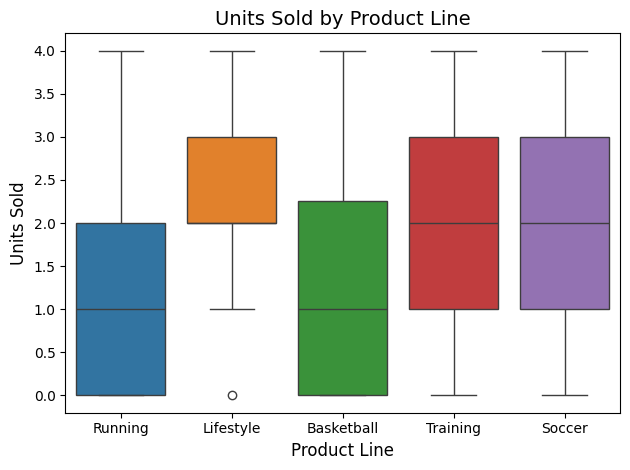

In [316]:
# Creates a boxplot between product line and units sold
sns.boxplot(data = df, x = 'Product_Line', y = 'Units_Sold', hue='Product_Line')

plt.title('Units Sold by Product Line', fontsize = 14)
plt.xlabel('Product Line', fontsize = 12)
plt.ylabel('Units Sold', fontsize = 12)

plt.tight_layout()
plt.show()


The boxplot above shows the distribution for the number of of units sold based on the specifc product line. 

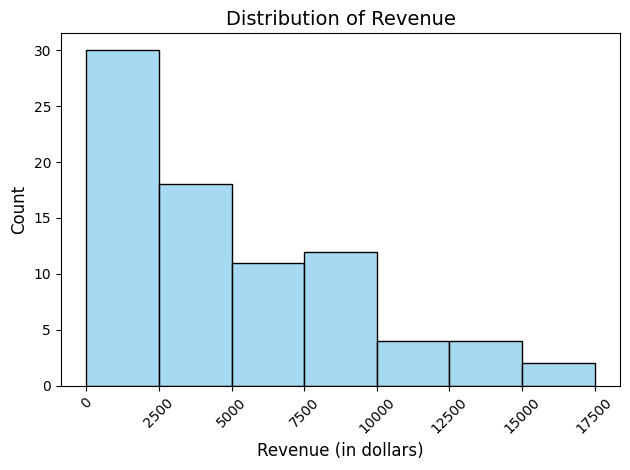

In [317]:
# Creates a histogram for revenue
bin_width = 2500

bins = np.arange(0, df['Revenue'].max() + bin_width, bin_width)

sns.histplot(df['Revenue'], bins=bins, color = 'skyblue')

plt.title('Distribution of Revenue', fontsize=14)
plt.xlabel('Revenue (in dollars)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(bins, rotation=45)

plt.tight_layout()
plt.show()

The histogram above shows the distribution of revenue, grouped into bins of $2500. 

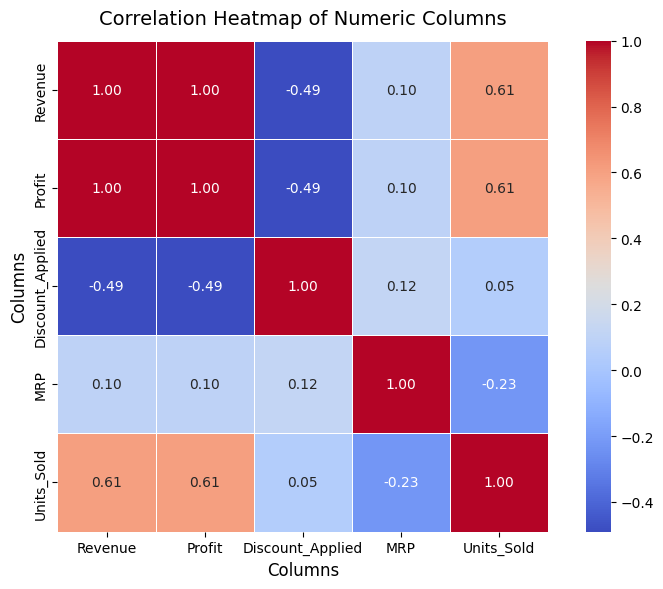

In [318]:
# Creates a heatmap for numeric columns
corr = df[['Revenue', 'Profit', 'Discount_Applied', 'MRP', 'Units_Sold']].corr()

plt.figure(figsize=(8,6))

sns.heatmap(data = corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)

plt.title('Correlation Heatmap of Numeric Columns', fontsize=14, pad=12)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Columns', fontsize=12)

plt.tight_layout()
plt.show()

The heatmap above illustrates the relationship between the numeric columns in the data, specifically by comparing the correlation coefficients between pairs. 

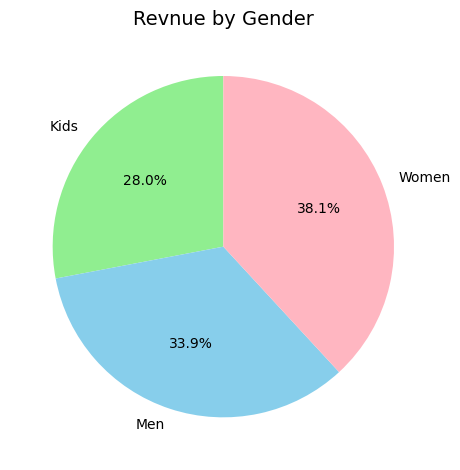

In [319]:
# Creates a pie chart for revenue by gender category
revenue_by_gender = df.groupby('Gender_Category')['Revenue'].sum()

plt.pie(
    revenue_by_gender,
    labels=revenue_by_gender.index,
    autopct='%1.1f%%',
    colors=['lightgreen', 'skyblue', 'lightpink'],
    startangle=90
)
plt.title('Revnue by Gender', fontsize = 14)

plt.tight_layout()
plt.show()

The pie chart above shows the proportion of total revenue for each gender category.

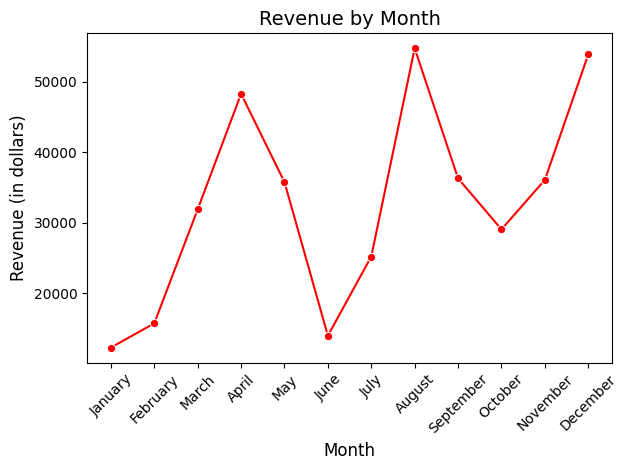

In [320]:
# Creates a line chart for revenue by month
df['Month'] = df['Order_Date'].dt.month_name()

profit_by_month = df.groupby(['Month_Num', 'Month'], as_index=False)['Revenue'].sum()

profit_by_month = profit_by_month.sort_values('Month_Num')

sns.lineplot(data=profit_by_month, x='Month', y='Revenue', marker='o', color = 'red')

plt.xticks(rotation=45)
plt.title("Revenue by Month", fontsize = 14)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Revenue (in dollars)', fontsize = 12)

plt.tight_layout()
plt.show()


The line chart above shows the monthly changes in revenue. 